## COVID-19 EDA 


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [ ]:
#data preprocessing
df = pd.read_csv("owid-covid-data.csv", header=0)
keep = [
    'total_cases',
    'total_deaths',
    'gdp_per_capita',
    'life_expectancy',
    'population_density',
    'stringency_index',
    'median_age',
    'hospital_beds_per_thousand',
    'human_development_index',
    'extreme_poverty'
]
sub = df[keep].copy()

#remove rows with 50% of values missing
sub = sub.dropna(thresh=len(keep)//2, axis=0)

num_cols = sub.select_dtypes(include=[np.number]).columns
imp = SimpleImputer(strategy='median')
sub[num_cols] = imp.fit_transform(sub[num_cols])

print(sub)

        total_cases  total_deaths  gdp_per_capita  life_expectancy  \
0               0.0           0.0        1803.987            64.83   
1               0.0           0.0        1803.987            64.83   
2               0.0           0.0        1803.987            64.83   
3               0.0           0.0        1803.987            64.83   
4               0.0           0.0        1803.987            64.83   
...             ...           ...             ...              ...   
429430     266386.0        5740.0        1899.775            61.49   
429431     266386.0        5740.0        1899.775            61.49   
429432     266386.0        5740.0        1899.775            61.49   
429433     266386.0        5740.0        1899.775            61.49   
429434     266386.0        5740.0        1899.775            61.49   

        population_density  stringency_index  median_age  \
0                   54.422              0.00        18.6   
1                   54.422             

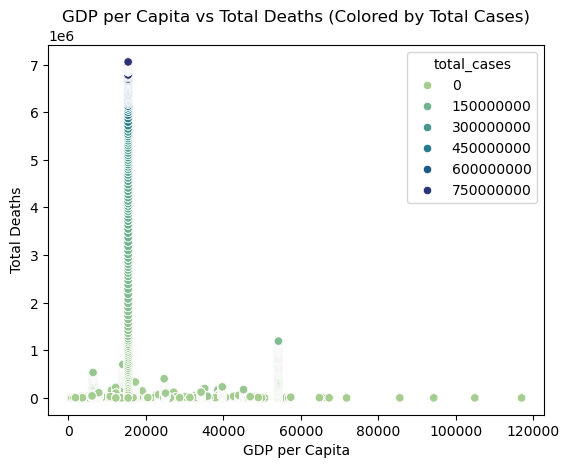

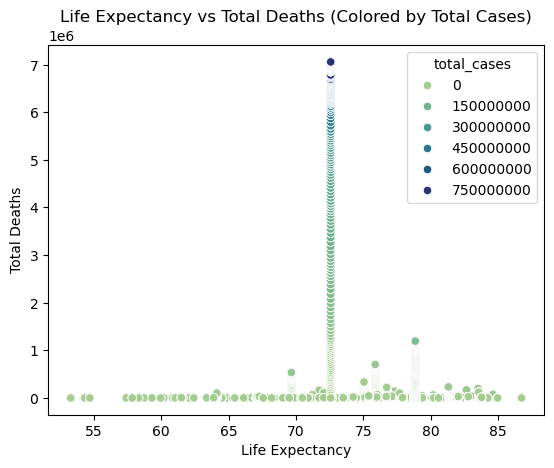

In [ ]:
#scatterplot for gdp vs total of deaths
sns.scatterplot(data= sub, x = 'gdp_per_capita', y = 'total_deaths', hue = 'total_cases', palette= 'crest')
plt.title('GDP per Capita vs Total Deaths (Colored by Total Cases)')
plt.xlabel('GDP per Capita')
plt.ylabel('Total Deaths')
plt.show()

#scatterplot for life expectancy vs total of deaths
sns.scatterplot(data= sub, x = 'life_expectancy', y = 'total_deaths', hue = 'total_cases', palette= 'crest')
plt.title('Life Expectancy vs Total Deaths (Colored by Total Cases)')
plt.xlabel('Life Expectancy')
plt.ylabel('Total Deaths')
plt.show()

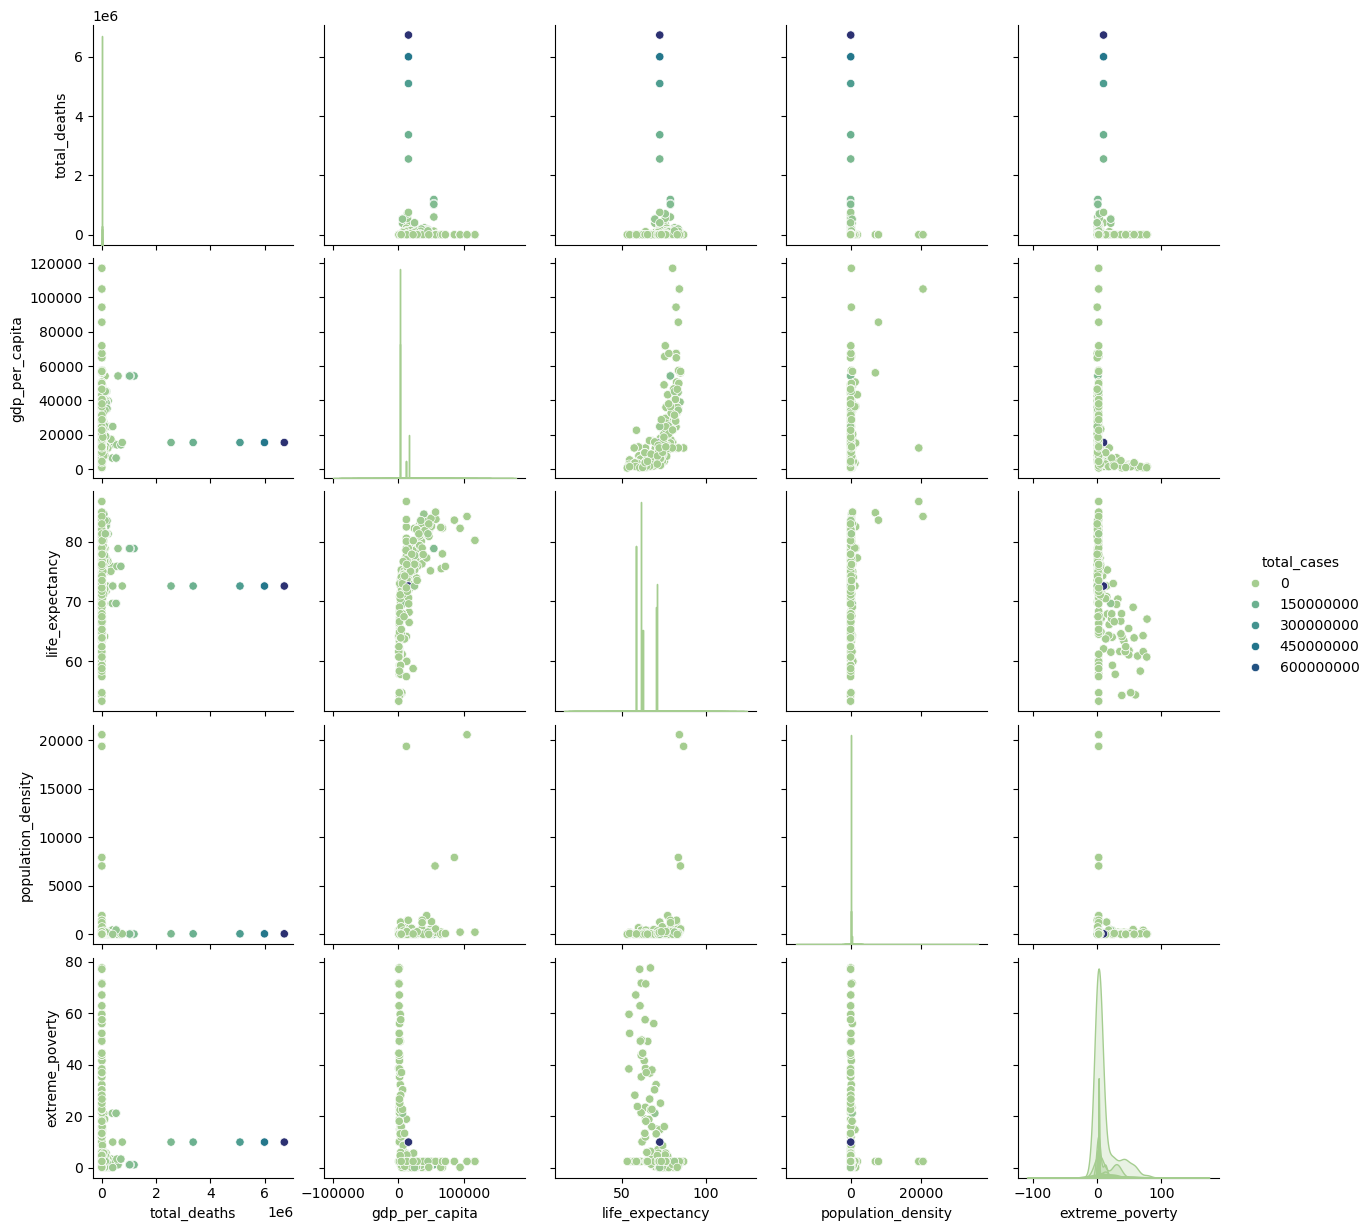

,total_deaths,gdp_per_capita,life_expectancy,population_density,extreme_poverty
total_deaths,1.000000,0.014127,0.023832,-0.019247,-0.017080
gdp_per_capita,0.014127,1.000000,0.643253,0.218224,-0.383687
life_expectancy,0.023832,0.643253,1.000000,0.219828,-0.580885
population_density,-0.019247,0.218224,0.219828,1.000000,-0.059169
extreme_poverty,-0.017080,-0.383687,-0.580885,-0.059169,1.000000


In [81]:

y = sub[['total_deaths', 'gdp_per_capita', 'life_expectancy', 'population_density', 'extreme_poverty']]

# test of 2k sample for visualization purposes
plot_data = sub[['total_deaths', 'gdp_per_capita', 'life_expectancy', 'population_density', 'extreme_poverty', 'total_cases']].sample(2000, random_state=42)

# pairplot with 6 attributes
sns.pairplot(plot_data, hue='total_cases', palette='crest')
plt.show()

# correlation matrix
y.corr(method='pearson')


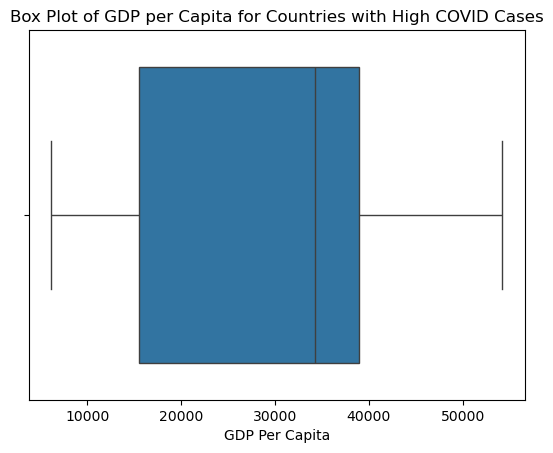

Q1: 15469.207 Q3: 39002.223 IQR: 23533.015999999996 Min: 6171.88 Max: 54225.446


In [60]:
#Create a box plot for attribute "PM2.5" for the instances of "Air Quality" class "Poor" and answer the following questions: (1) what are the Q1, median, Q3, IQR, minimum, maximum in this plot? (2) how many outliers in the plot? (3) Is the box lot skewed? If yes, what is the type of skewness and why do you think it is this type?

high_covid = df[df['total_cases'] > 10000000]

sns.boxplot(x=high_covid['gdp_per_capita'])
plt.title('Box Plot of GDP per Capita for Countries with High COVID Cases')
plt.xlabel('GDP Per Capita')
plt.show()

q1 = high_covid['gdp_per_capita'].quantile(0.25)
q3 = high_covid['gdp_per_capita'].quantile(0.75)
iqr = q3 - q1

#stop at whisker
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)

min_val = high_covid['gdp_per_capita'][high_covid['gdp_per_capita'] > lower_fence].min()
max_val = high_covid['gdp_per_capita'][high_covid['gdp_per_capita'] < upper_fence].max()

print('Q1:', q1, 'Q3:', q3, 'IQR:', iqr,'Min:', f"{min_val:.2f}" , 'Max:', max_val)


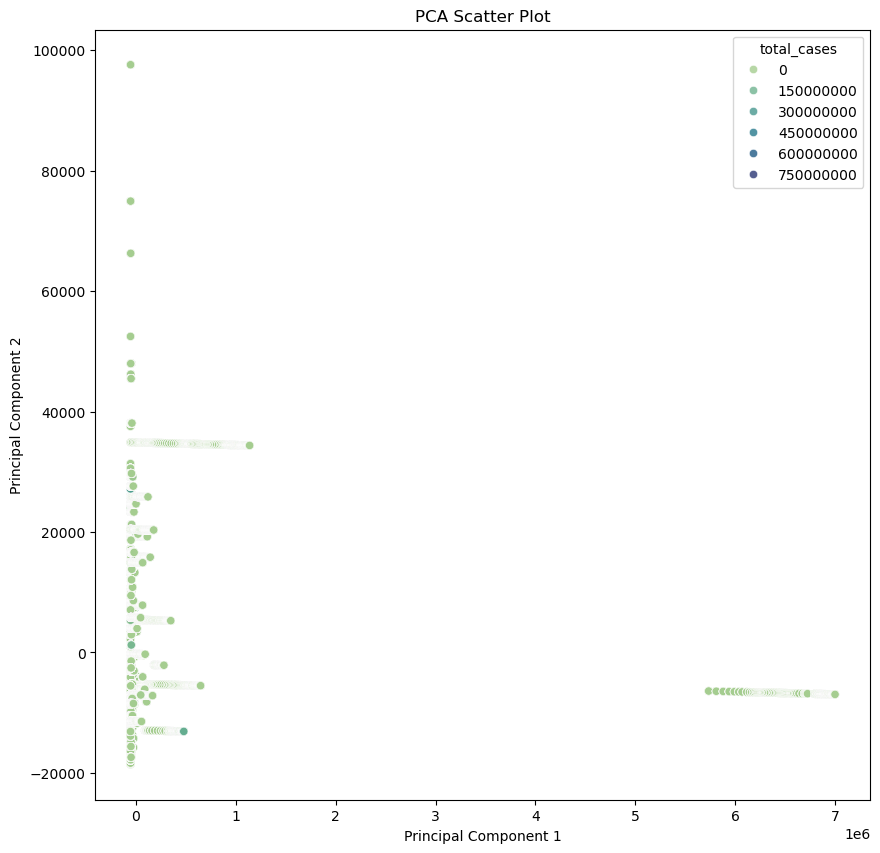

In [67]:
x = df[['location', 'continent', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'life_expectancy', 'population_density']]
features = x.drop(columns=['total_cases', 'continent', 'date', 'location'])

pca = PCA(n_components = 2)
mask_nonzero = (features > 0).all(axis=1)  # True only if every column > 0
features = features[mask_nonzero].dropna()

principalComponents = pca.fit_transform(features)

principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

fig = plt.figure(figsize = (10,10))

sns.scatterplot(x=principalDf['principal component 1'], 
                y=principalDf['principal component 2'], 
                alpha=0.8, hue = df['total_cases'], palette = 'crest')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

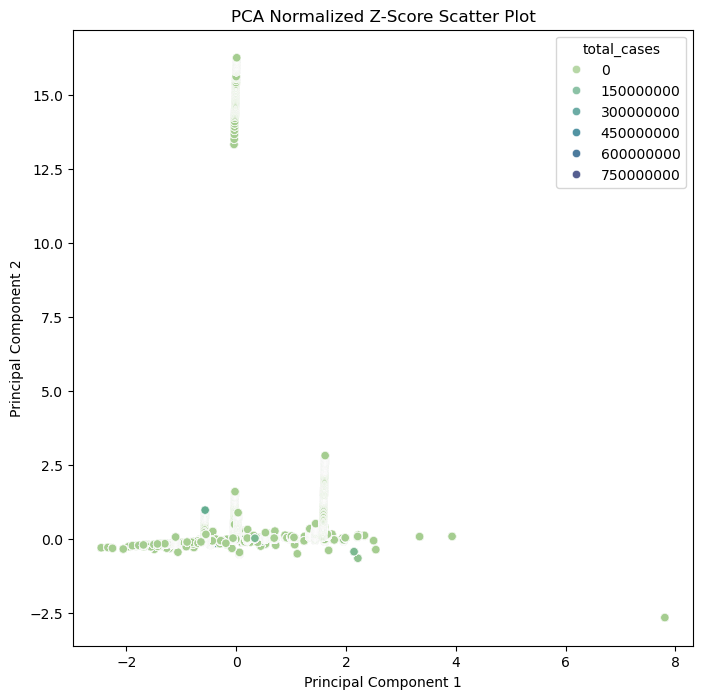

In [68]:
#z-score and min/max norm
def data_norm(x, norm = "z_score"):
    eps = np.finfo(float).eps
    if norm == "z_score":
        x_norm = x - np.expand_dims(x.mean(0), axis=0)
        x_norm = x_norm / (np.expand_dims(x.std(0), axis=0) + eps)
    else:
        x_norm = x - np.expand_dims(x.min(0), axis=0)
        x_norm = x_norm / (np.expand_dims((x.max(0) - x.min(0)), axis=0) + eps)
    
    return x_norm


x_zscore = data_norm(features.values, "z_score")

x_minmax = data_norm(features.values, "min_max")


principalComponents = pca.fit_transform(x_zscore)

principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

fig = plt.figure(figsize = (8,8))

sns.scatterplot(x=principalDf['principal component 1'], 
                y=principalDf['principal component 2'], 
                alpha=0.8, hue = df['total_cases'], palette = 'crest')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Normalized Z-Score Scatter Plot')
plt.show()